In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()

while True:
    data = pd.read_csv("output.csv")
    lm = data['left motor'].values
    rm = data['right motor'].values
    clear_output(wait=True)
    xplot = np.arange(0, data.shape[0]/20, 0.05)
    plt.plot(xplot, lm, label='left-motor')
    plt.plot(xplot, rm, label='right-motor')
    #print(len(xplot))
    #data.plot(x=data['left sensor'], y=data['left motor'])
    #y = np.random.random()
    #plt.scatter(i, y)
    #clear_output(wait=True)
    #print(data.shape[0])
    plt.pause(1)

while True:
    clear_output()
    plt.pause(1)
#clear_output()

In [ ]:
'''
grid = plt.figure(figsize=(20,10))

ls = grid.add_subplot(321)
ls.plot(time, data[:,0], label='left-light')
plt.title("Left Light Sensor")
ls.set_ylim(0, 0.5)

rs = grid.add_subplot(322)
rs.plot(time, data[:,1], label='right-light')
plt.title("Right Light Sensor")
rs.set_ylim(0, 0.5)

luv = grid.add_subplot(323)
luv.plot(time, data[:,2], label='left-uv')
plt.title("Left UV Sensor")
luv.set_ylim(0, 0.8)

ruv = grid.add_subplot(324)
ruv.plot(time, data[:,3], label='right-uv')
plt.title("Right UV Sensor")
ruv.set_ylim(0, 0.8)

lm = grid.add_subplot(325)
lm.plot(time, data[:,4], label='left-motor')
plt.title("Left Motor")
lm.set_ylim(-500, 500)

rm = grid.add_subplot(326)
rm.plot(time, data[:,5], label='right-motor')
plt.title("Right Motor")
rm.set_ylim(-500, 500)


plt.legend()

plt.show()
'''
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()


#grid.canvas.draw()
while True:
    grid = plt.figure(figsize=(20,10))
    ls = grid.add_subplot(321)
    plt.title("Left Light Sensor")
    rs = grid.add_subplot(322)
    plt.title("Right Light Sensor")
    luv = grid.add_subplot(323)
    ruv = grid.add_subplot(324)
    lm = grid.add_subplot(325)
    rm = grid.add_subplot(326)

    data = pd.read_csv("output.csv")
    time = np.arange(0, data.shape[0]/20, 0.05)
    lmv = data['left motor'].values
    rmv = data['right motor'].values
    lsv = data['left sensor'].values
    rsv = data['right sensor'].values
    luvv = data['left ultrasound sensor'].values
    ruvv = data['right ultrasound sensor'].values
    
    ls.plot(time, lsv, label='left-light')
    ls.set_ylim(0, 0.5)
    
    rs.plot(time, rsv, label='right-light')
    rs.set_ylim(0, 0.5)

    luv.plot(time, luvv, label='left-uv')
    luv.set_ylim(0, 0.8)

    ruv.plot(time, ruvv, label='right-uv')
    ruv.set_ylim(0, 0.8)

    lm.plot(time, lmv, label='left-motor')
    lm.set_ylim(-500, 500)

    rm.plot(time, rmv, label='right-motor')
    rm.set_ylim(-500, 500)
    
    clear_output(wait=True)
    plt.pause(1)
    
    #plt.plot(xplot, lm, label='left-motor')
    #plt.plot(xplot, rm, label='right-motor')
    #print(len(xplot))
    #data.plot(x=data['left sensor'], y=data['left motor'])
    #y = np.random.random()
    #plt.scatter(i, y)
    #clear_output(wait=True)
    #print(data.shape[0])
    
    
while True:
    clear_output(wait=True)
    plt.pause(1)
#clear_output()


In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
z = data[:,4] + data[:,5]
x = data[:,0]
y = data[:,1]
ax.plot(x,y,z,label='interesting lines')
ax.legend()
ax.set_xlabel('Left UV Sensor')
ax.set_ylabel('Right UV Sensor')
ax.set_zlabel('Relative Motor Speed')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(-1000, 1000)

plt.show()

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import timeit

start_time = timeit.default_timer()

plt.ion()

while True:
    data = pd.read_csv("output.csv")    
    plt.figure(figsize=(20,20))
    x = data['left sensor'].values + data['right sensor'].values
    y = data['left motor'].values + data['right motor'].values
    clear_output(wait=True)
    plt.subplot(211)
    plt.plot(x, y, label="Sensory-Motor path", alpha=0.1)
    
    recentX = x[-60:]
    recentY = y[-60:]
    plt.plot(recentX, recentY, color="red")
    
    plt.title("Motor Speed vs Relative Light w/ Vectors")
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, alpha=0.1)
    plt.quiver(x[-60:-1], y[-60:-1], x[-59:]-x[-60:-1], y[-59:]-y[-60:-1], scale_units='xy', angles='xy', scale=1, color='red')
    plt.xlabel('Light')
    plt.ylabel('Motor Speed')
    
    plt.subplot(212)
    plt.hist2d(x, y, norm=mpl.colors.LogNorm(), bins=11, cmap=plt.cm.YlGnBu)
    plt.title("Motor Speed vs Relative Light w/ Colour Plot")
    plt.xlabel('Light')
    plt.ylabel('Motor Speed')
    
    plt.colorbar(orientation='horizontal', label='Frequency of visits')
    #plt.show()
    plt.tight_layout()
    plt.pause(1)
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
    start_time = timeit.default_timer()
    
while True:
    clear_output()
    plt.pause(1)


In [ ]:
while True:
    plt.figure(figsize=(20,10))
    data = pd.read_csv("output.csv")

    data['right motor'] = data['right motor'].values/1000
    data['left motor'] = data['left motor'].values/1000
    
    left_motor = data['left motor'].values
    left_motor_norm = left_motor / 1000
    right_motor = data['right motor'].values
    right_motor_norm = right_motor / 1000
    total_motor_norm = (left_motor+right_motor) / 1000
    #print(right_motor_norm)

    left_sensor = data['left sensor'].values
    right_sensor = data['right sensor'].values
    total_sensor = left_sensor + right_sensor
    #print(left_sensor)

    left_us_sensor = data['left ultrasound sensor'].values
    right_us_sensor = data['right ultrasound sensor'].values
    #print(left_us_sensor)

    #print(data)
    clear_output(wait=True)
    im = plt.imshow(data,cmap='hot',aspect='auto', interpolation='bilinear')
    plt.colorbar(im,orientation='horizontal')
    plt.pause(1)

while True:
    clear_output(wait=True)
    plt.pause(1)


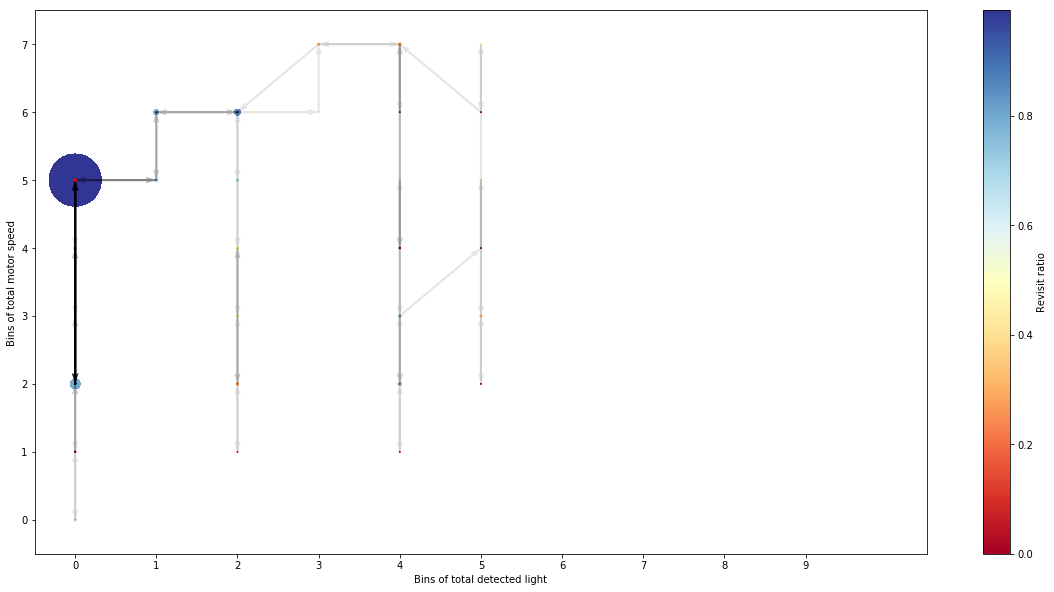

4.191490940997028


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
from IPython.display import clear_output
import time
import timeit

start_time = timeit.default_timer()
# code you want to evaluate

while True:
    np.set_printoptions(threshold=np.nan,suppress=True)
    data = pd.read_csv("output.csv")
    data['right motor'] = data['right motor'].values/1000 #min -1 max 1
    data['left motor'] = data['left motor'].values/1000 #min -1 max 1
    NUM_OF_BINS = 10
    #making -1 scale to 0. 
    total_motor = (0.5*((data['left motor'].values + data['right motor'].values)/2) + 0.5) * NUM_OF_BINS
    total_sensor = ((data['left sensor'].values + data['right sensor'].values) / 2)  * NUM_OF_BINS
    
    #Temp workaround
    for i in range(0,len(total_motor)):
        if total_motor[i] == 10:
            total_motor[i] = 9
        if total_sensor[i] == 10:
            total_sensor[i] = 9
    
    total_motor = np.floor(total_motor).astype(int)
    total_sensor = np.floor(total_sensor).astype(int)
    total = total_sensor + NUM_OF_BINS * total_motor
    #print(total_motor)
    #total = np.floor(total).astype(int)
    #print(np.floor(total))
    
    dictionary = {}
    #Frequency of bins that have been visited
    frequency = {}
    
    for i in range(0,100):
        frequency[i] = 0
        dictionary[i] = {}
    
    for i in range(len(total)-1):
        if total[i] not in dictionary:
            dictionary[total[i]] = {}

        if total[i+1] not in dictionary[total[i]]:
            dictionary[total[i]][total[i+1]] = 1
        else:
            dictionary[total[i]][total[i+1]] += 1

    firstArray = np.array([0,1,2,3,4,5,6,7,8,9])
    secondArray = np.array([0,10,20,30,40,50,60,70,80,90])
    xArray = np.digitize(total%10,firstArray)
    xArray -= 1
    yArray = np.digitize(total,secondArray)
    yArray -= 1



    for i in total:
        index = int(i)
        #print(destDictionary)
        frequency[index] += 1

    areaArray = []
    colourArray = []
    for t in total:
        areaArray.append(frequency[t])
        if t in dictionary[t]:
            revisitRatio = (dictionary[t][t])/frequency[t]
        else:
            revisitRatio = 0
        colourArray.append(revisitRatio)

    #plt.scatter(x=xArray,y=yArray)
    #plt.plot(xArray,yArray)
    #print(xArray,yArray)
    #ax=plt.axes()
    #ax.arrow(0,1,0.2,0,head_width=0.01, head_length=0.1, fc='k', ec='k')
    #plt.arrow(0,0,1,0, head_width=0.01, head_length=0.1)
    #plt.hist2d(x=xArray,y=yArray, norm=mpl.colors.LogNorm(),cmap=plt.cm.YlGnBu)
    #plt.colorbar()
    #plt.quiver(xArray[:-1], yArray[:-1], xArray[1:]-xArray[:-1],yArray[1:]-yArray[:-1])
    #plt.subplot(212)
    clear_output(wait=True)
    plt.figure(figsize=(20,10))
    #plt.hist2d(x=total_motor,y=total_sensor,bins=NUM_OF_BINS, cmap=plt.cm.YlGnBu)
    sc = plt.scatter(x=xArray,y=yArray, c=colourArray, s=areaArray, cmap=plt.cm.RdYlBu)
    plt.quiver(xArray[:-1], yArray[:-1], xArray[1:]-xArray[:-1],yArray[1:]-yArray[:-1], angles='xy', scale=1, scale_units='xy', alpha=0.1)
    plt.quiver(xArray[-40:-1], yArray[-40:-1], xArray[-39:]-xArray[-40:-1], yArray[-39:]-yArray[-40:-1], scale_units='xy', angles='xy', scale=1, color='red',units='xy', width=0.03)
    plt.colorbar(sc, label="Revisit ratio")
    plt.xlim(-0.5,10.5)
    plt.ylim(-0.5,max(yArray)+0.5)
    plt.xlabel('Bins of total detected light')
    plt.ylabel('Bins of total motor speed')
    plt.xticks(np.arange(0, 10, 1))
    plt.yticks(np.arange(0, max(yArray)+1, 1))
    #plt.show()

    plt.pause(1)
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
    start_time = timeit.default_timer()

while True:
    clear_output(wait=True)
    plt.pause(1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections

np.set_printoptions(threshold=np.nan,suppress=True)
data = pd.read_csv("output.csv")
NUM_OF_BINS = 10
#making -1 scale to 0. 
total_ultrasound = ((data['left ultrasound sensor'].values + data['right ultrasound sensor'].values) / 2)  * NUM_OF_BINS
total_sensor = ((data['left sensor'].values + data['right sensor'].values) / 2)  * NUM_OF_BINS
time = np.arange(0, data.shape[0]/20, 0.05)

#Temp workaround
for i in range(0,len(total_sensor)):
    if total_sensor[i] == 10:
        total_sensor[i] = 9
    if total_ultrasound[i] == 10:
        total_ultrasound[i] = 9

total_ultrasound = np.floor(total_ultrasound).astype(int)
total_sensor = np.floor(total_sensor).astype(int)
total = total_sensor + NUM_OF_BINS * total_ultrasound
#print(total_motor)
#total = np.floor(total).astype(int)
#print(np.floor(total))

dictionary = {}
#Frequency of bins that have been visited
frequency = {}

for i in range(0,100):
    frequency[i] = 0
    dictionary[i] = {}

for i in range(len(total)-1):
    if total[i] not in dictionary:
        dictionary[total[i]] = {}

    if total[i+1] not in dictionary[total[i]]:
        dictionary[total[i]][total[i+1]] = 1
    else:
        dictionary[total[i]][total[i+1]] += 1

firstArray = np.array([0,1,2,3,4,5,6,7,8,9])
secondArray = np.array([0,10,20,30,40,50,60,70,80,90])
xArray = np.digitize(total%10,firstArray)
xArray -= 1
yArray = np.digitize(total,secondArray)
yArray -= 1



for i in total:
    index = int(i)
    #print(destDictionary)
    frequency[index] += 1

areaArray = []
colourArray = []
for t in total:
    areaArray.append(frequency[t])
    if t in dictionary[t]:
        revisitRatio = (dictionary[t][t])/frequency[t]
    else:
        revisitRatio = 0
    colourArray.append(revisitRatio)

#plt.scatter(x=xArray,y=yArray)
#plt.plot(xArray,yArray)
#print(xArray,yArray)
#ax=plt.axes()
#ax.arrow(0,1,0.2,0,head_width=0.01, head_length=0.1, fc='k', ec='k')
#plt.arrow(0,0,1,0, head_width=0.01, head_length=0.1)
#plt.hist2d(x=xArray,y=yArray, norm=mpl.colors.LogNorm(),cmap=plt.cm.YlGnBu)
#plt.colorbar()
#plt.quiver(xArray[:-1], yArray[:-1], xArray[1:]-xArray[:-1],yArray[1:]-yArray[:-1])
#plt.subplot(212)
plt.figure(figsize=(20,10))
#plt.hist2d(x=total_motor,y=total_sensor,bins=NUM_OF_BINS, cmap=plt.cm.YlGnBu)
sc = plt.scatter(x=xArray,y=yArray, c=colourArray, s=areaArray, cmap=plt.cm.RdYlBu)
plt.quiver(xArray[:-1], yArray[:-1], xArray[1:]-xArray[:-1],yArray[1:]-yArray[:-1], angles='xy', scale=1, scale_units='xy', alpha=0.1)
plt.quiver(xArray[-40:-1], yArray[-40:-1], xArray[-39:]-xArray[-40:-1], yArray[-39:]-yArray[-40:-1], scale_units='xy', 
           angles='xy', scale=1, color='red',units='xy', width=0.03)
plt.colorbar(sc, label="Revisit ratio")
plt.xlim(-0.5,10.5)
plt.ylim(-0.5,max(yArray)+0.5)
plt.xlabel('Bins of total detected light')
plt.ylabel('Bins of total detected ultrasound')
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, max(yArray)+1, 1))
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from IPython.display import clear_output
import time
import timeit

start_time = timeit.default_timer()

while True:
    np.set_printoptions(threshold=np.nan,suppress=True)
    data = pd.read_csv("output.csv")
    data['right motor'] = data['right motor'].values/1000 #min -1 max 1
    data['left motor'] = data['left motor'].values/1000 #min -1 max 1
    NUM_OF_BINS = 10
    #making -1 scale to 0. 
    motor_diff = (data['left motor'].values - data['right motor'].values)/2
    sensor_diff = (data['right sensor'].values - data['left sensor'].values)/2
    avg_sensor = ((data['left sensor'].values + data['right sensor'].values) / 2)
    avg_ultrasound = ((data['left ultrasound sensor'].values + data['right ultrasound sensor'].values) / 2)

    time = np.arange(0, data.shape[0]/20, 0.05)
    left_motor = data['left motor'].values
    right_motor = data['right motor'].values
    total_sensor = data['left sensor'].values + data['right sensor'].values
    plt.figure(figsize=(10,30))

    left_sensor = data['left sensor'].values
    right_sensor = data['right sensor'].values
    left_us = data['left ultrasound sensor'].values
    right_us = data['right ultrasound sensor'].values

    clear_output(wait=True)
    
    sc = plt.scatter(sensor_diff, time, c=avg_sensor, cmap=plt.cm.autumn, label='Light sensor difference')
    plt.colorbar(sc, label='Average light sensor value')
    md1 = plt.plot(motor_diff[0::3], time[0::3], color='black', label='Motor difference (forwards)')

    md1copy = list(motor_diff)


    frontBackArray = []
    for i in range(0,len(time)):
        if ((left_motor[i] >= 0) and (right_motor[i] >= 0)):
            md1copy[i] = np.NaN


    md1_masked = np.ma.masked_invalid(md1copy)
    
    md1b = plt.plot(md1_masked[0::3], time[0::3], color='xkcd:neon green', linewidth=2, label='Motor difference (backwards)')
    lul = plt.plot(-left_us,time, color='xkcd:darkblue', linewidth=3, alpha=0.33, label='Left ultrasound sensor')
    rul = plt.plot(right_us, time, color='xkcd:sky blue', linewidth=3, alpha=0.33, label='Right ultrasound sensor')

    plt.xlim(-1,1)
    #plt.legend([sc, md1, md1b, lul, rul], ['Light sensor difference', 'Motor speed (forwards)', 'Motor speed (backwards)', 'Left ultrasound sensor', 'Right ultrasound sensor'])
    plt.legend()
    
    plt.pause(1)
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
    start_time = timeit.default_timer()

while True:
    clear_output(wait=True)
    plt.pause(1)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

np.set_printoptions(threshold=np.nan,suppress=True)
data = pd.read_csv("output.csv")
data['right motor'] = data['right motor'].values/1000 #min -1 max 1
data['left motor'] = data['left motor'].values/1000 #min -1 max 1
NUM_OF_BINS = 10
#making -1 scale to 0. 
motor_diff = (data['left motor'].values - data['right motor'].values)/2
avg_sensor = ((data['left sensor'].values + data['right sensor'].values) / 2)
avg_ultrasound = ((data['left ultrasound sensor'].values + data['right ultrasound sensor'].values) / 2)

time = np.arange(0, data.shape[0]/20, 0.05)
left_motor = data['left motor'].values
right_motor = data['right motor'].values

plt.figure(figsize=(30,10))

left_sensor = data['left sensor'].values
right_sensor = data['right sensor'].values
left_us = data['left ultrasound sensor'].values
right_us = data['right ultrasound sensor'].values

plt.subplot(211)
ls = plt.scatter(time, left_sensor, color='xkcd:forest green', alpha=0.1)
rs = plt.scatter(time, right_sensor, color='xkcd:bright green', alpha=0.1)
lsl = plt.plot(time, left_sensor, color='xkcd:forest green', linewidth=3)
rsl = plt.plot(time, right_sensor, color='xkcd:bright green', linewidth=3)

plt.subplot(212)
luv = plt.scatter(time, left_us, color='xkcd:royal blue', alpha=0.1)
ruv = plt.scatter(time, right_us, color='xkcd:sky blue', alpha=0.1)
luvl = plt.plot(time, left_us, color='xkcd:royal blue', linewidth=3)
ruvl = plt.plot(time, right_us, color='xkcd:sky blue', linewidth=3)
#sc = plt.scatter(motor_diff, time, c=avg_sensor, cmap=plt.cm.autumn)
#md2 = plt.plot(motor_diff[0::10], time[0::10], color='black', alpha=0.33)
#plt.legend([ls, rs, luv, ruv, lsl, rsl, luvl, ruvl], ['Left Sensor (scatter)', 'Right Sensor (scatter)', 'Left Ultrasound (scatter)', 'Right Ultrasound (scatter)', 'Left Sensor (smoothed)', 'Right Sensor (smoothed)','Left Ultrasound (smoothed)', 'Right Ultrasound (smoothed)'])
plt.show()